### Module and data imports

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib as plt
import os
# from google.colab import drive
# drive.mount('/content/drive')
# folder_path = '/content/drive/My Drive/archive'
# os.chdir(folder_path)
# !ls
# %autosave 60

In [2]:
# Import data
df1 = pd.read_csv('articles1.csv')
df2 = pd.read_csv('articles2.csv')
df3 = pd.read_csv('articles3.csv')

# Merge data into one dataframe
frames = [df1, df2, df3]
data = pd.concat(frames)
display(data.head())
# Convert data column into datetime
data['date'] = pd.to_datetime(data['date'])

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [3]:
# Drop unused columns
try:
    data = data.drop(['Unnamed: 0', 'year', 'month', 'url'], axis=1)
except KeyError as e:
    print(f"Columns already removed from dataframe: {e}")
print(data.dtypes)
print(data.shape)
data.head()

id                      int64
title                  object
publication            object
author                 object
date           datetime64[ns]
content                object
dtype: object
(142570, 6)


,id,title,publication,author,date,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,"SEOUL, South Korea — North Korea’s leader, ..."


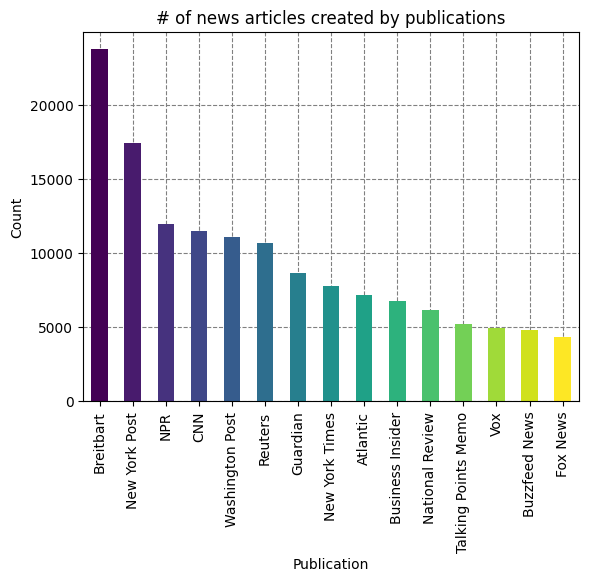

In [4]:
# Create a simple visualization of news articles
counts = data['publication'].value_counts()

# Generate a range of colors based on the number of unique publications
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Create a bar plot
ax = counts.plot(kind='bar', color=colors)
ax.set_xlabel('Publication')
ax.set_ylabel('Count')
ax.set_title('# of news articles created by publications')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

### Hardcoding of 3 different events
Hardcode the articles of 3 different events so that we can use these for further analysis while we wait on TF-IDF Clustering

In [25]:
import datetime

# temporarily set max display rows to infinite (to search through them)
pd.set_option('display.max_rows', None)

In [29]:
# filter by date (to have news from 3 day window)
filtered_data = data.copy()
filtered_data = data[(data['date'] >= '2017-2-1') & (data['date'] <= '2017-2-3')] 
#filtered_data.head()
print(len(filtered_data))
display(filtered_data)

# news events chosen are
# 1. SEAL team raid Yemen
# 2. Hostage situation hospital

SEAL_data = 

1116


,id,title,publication,author,date,content
50,17341,President Xi’s Great Chinese Soccer Dream - Th...,New York Times,Chris Buckley,2017-02-01,"QINGYUAN, China — The 48 soccer fields of t..."
330,17654,"William Peter Blatty, Author of ‘The Exorcist,...",New York Times,Paul Vitello,2017-02-01,"William Peter Blatty, the author whose book ..."
537,17893,First Day of Syria Peace Talks Quickly Descend...,New York Times,Anne Barnard and Hwaida Saad,2017-02-03,"ASTANA, Kazakhstan — The first meeting b..."
601,17961,"Rap Trio Migos Cracks the Code to a No. 1 Hit,...",New York Times,Joe Coscarelli,2017-02-02,By the time Donald Glover puzzled Hollywood’s ...
683,18049,"50 Years After Apollo Disaster, Memorial for 3...",New York Times,Lily Koppel,2017-02-03,"CAPE CANAVERAL, Fla. — Back in his days as ..."
706,18073,"Quebec Mosque Shooting Kills at Least 6, and 2...",New York Times,Ian Austen and Craig S. Smith,2017-02-02,OTTAWA — Gunmen opened fire in a mosque in ...
720,18112,The Alt-Majority: How Social Networks Empowere...,New York Times,Farhad Manjoo,2017-02-02,The presidency of Donald J. Trump has been not...
721,18113,Trump’s Trade War May Have Already Begun - The...,New York Times,Peter S. Goodman,2017-02-03,LONDON — America’s traditional allies are o...
723,18116,"Science Will Suffer Under Trump’s Travel Ban, ...",New York Times,Henry Fountain,2017-02-02,"Researchers, academic officials and science po..."
725,18118,Samantha Bee to Roast Trump on Same Night as C...,New York Times,Dave Itzkoff,2017-02-03,The annual custom of the White House Correspon...


### Process similar articles
TF-IDF, K-Means, other methods

In [ ]:
# use TF-IDF (maybe together with K-Means) to process articles and find which are similar
def process_similar_articles(data):
    """
    Returns updated pandas dataframe, with 'event_id' column, indicating what event article relates to

    Should be possible for specific timeframe, as else it might be way too much data to process at once
    """
    # ...

    # maybe use timeframes in order to do this, as news events could happen twice at different times, and we don't want to mix these up
    # e.g. look for "maersk cocaine bust" articles from 01-09 to 10-09

    # one approach could be finding similar articles for each article first, and then matching these similarities
    return

### Visualize different events
e.g. all articles on one particular event

In [ ]:
# visualize which articles belong to the same event
# index, id, title, publication, author, date, year, month, url, article, event_id

def find_articles_by_event(id):
    """
    Using input 'id', return all events associated with this
    """
    # ...
    return

def find_event_by_query(query, start_date, end_date):
    """
    For a certain query (e.g. "mearsk cocaine bust"), and date range, return all articles about event

    What to do if there are multiple events matching this? return all and specify how they are about different events?
    """
    # ...
    return

### Analyze different events
for one event, show different methods of analyzing different reportings on it:
1. Who reports on certain events
2. Summary of their reporting (how do the summaries differ)
3. What is left out compared to other reportings, what is exaggerated
4. What political leaning does the article have
5. …

#### Some other method..
..

In [ ]:
# ..

#### NLP Summary reporting
Can this be used to extract differences in reporting?

In [ ]:
# Do a bunch of filtering first (take out links, contractions, etc., see example kaggle notebook)
# ..

### Scraping

In [ ]:
# scraping
def scrape_net():
    """
    Some function for scraping the net, and creating new excel news sheets, no idea how this would look
    """
    # ..